# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library


In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
base_url = "https://api.openweathermap.org/data/2.5/weather?" # YOUR CODE HERE
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}&appid={weather_api_key}&units={units}&q={city}"
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
 

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json() # YOUR CODE HERE
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]['lat']
        city_lng = city_weather["coord"]['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

#     If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dikson
Processing Record 2 of Set 1 | thompson
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | krasnovishersk
Processing Record 5 of Set 1 | atikokan
Processing Record 6 of Set 1 | turukhansk
Processing Record 7 of Set 1 | bambous virieux
Processing Record 8 of Set 1 | college
Processing Record 9 of Set 1 | mount isa
Processing Record 10 of Set 1 | vila velha
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | nemuro
Processing Record 14 of Set 1 | chuy
Processing Record 15 of Set 1 | marsh harbour
Processing Record 16 of Set 1 | tilichiki
Processing Record 17 of Set 1 | constitucion
Processing Record 18 of Set 1 | pacific grove
Processing Record 19 of Set 1 | tuktoyaktuk
Processing Record 20 of Set 1 | yerbogachen
Processing Record 21 of Set 1 | cape town
Processing Record 22 of Set 1 | luderitz
Processing Record 

Processing Record 38 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 39 of Set 4 | bodden town
Processing Record 40 of Set 4 | ponta do sol
Processing Record 41 of Set 4 | lima
Processing Record 42 of Set 4 | kahului
Processing Record 43 of Set 4 | rungata
City not found. Skipping...
Processing Record 44 of Set 4 | dunedin
Processing Record 45 of Set 4 | sola
Processing Record 46 of Set 4 | ballstad
City not found. Skipping...
Processing Record 47 of Set 4 | kutum
Processing Record 48 of Set 4 | clyde river
Processing Record 49 of Set 4 | poum
Processing Record 0 of Set 5 | santa fe
Processing Record 1 of Set 5 | tasiilaq
Processing Record 2 of Set 5 | amancio
City not found. Skipping...
Processing Record 3 of Set 5 | pevek
Processing Record 4 of Set 5 | hounde
Processing Record 5 of Set 5 | stoyba
City not found. Skipping...
Processing Record 6 of Set 5 | nouadhibou
Processing Record 7 of Set 5 | mabai
Processing Record 8 of Set 5 | hervey bay
Processing Reco

Processing Record 24 of Set 8 | salta
Processing Record 25 of Set 8 | meyungs
City not found. Skipping...
Processing Record 26 of Set 8 | hersbruck
Processing Record 27 of Set 8 | mega
Processing Record 28 of Set 8 | vila franca do campo
Processing Record 29 of Set 8 | qena
Processing Record 30 of Set 8 | leh
Processing Record 31 of Set 8 | grindavik
Processing Record 32 of Set 8 | hamada
Processing Record 33 of Set 8 | doctor pedro p. pena
City not found. Skipping...
Processing Record 34 of Set 8 | coquimbo
Processing Record 35 of Set 8 | san joaquin
Processing Record 36 of Set 8 | palmer
Processing Record 37 of Set 8 | el tigre
Processing Record 38 of Set 8 | jinchengjiang
City not found. Skipping...
Processing Record 39 of Set 8 | benjamin constant
Processing Record 40 of Set 8 | oboyan
Processing Record 41 of Set 8 | ostrovnoy
Processing Record 42 of Set 8 | naze
Processing Record 43 of Set 8 | beringovskiy
Processing Record 44 of Set 8 | chapais
Processing Record 45 of Set 8 | kaz

Processing Record 7 of Set 12 | griffith
Processing Record 8 of Set 12 | nanakuli
Processing Record 9 of Set 12 | le port
Processing Record 10 of Set 12 | kazachinskoye
Processing Record 11 of Set 12 | zatoka
Processing Record 12 of Set 12 | malakal
Processing Record 13 of Set 12 | jacareacanga
Processing Record 14 of Set 12 | ancud
Processing Record 15 of Set 12 | goderich
Processing Record 16 of Set 12 | souillac
Processing Record 17 of Set 12 | barabai
Processing Record 18 of Set 12 | lavumisa
Processing Record 19 of Set 12 | ixtapa
Processing Record 20 of Set 12 | villarrobledo
Processing Record 21 of Set 12 | mfou
Processing Record 22 of Set 12 | narimanov
Processing Record 23 of Set 12 | kenai
Processing Record 24 of Set 12 | juifang
City not found. Skipping...
Processing Record 25 of Set 12 | cao bang
Processing Record 26 of Set 12 | churapcha
Processing Record 27 of Set 12 | havelock
Processing Record 28 of Set 12 | muli
Processing Record 29 of Set 12 | aswan
Processing Record 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data) # YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          532
Lat           532
Lng           532
Max Temp      532
Humidity      532
Cloudiness    532
Wind Speed    532
Country       532
Date          532
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dikson,73.5069,80.5464,-5.69,97,100,2.86,RU,1675607560
1,thompson,55.7435,-97.8558,-9.24,84,100,2.30,CA,1675607560
2,vaini,-21.2000,-175.2000,79.74,78,51,10.11,TO,1675607372
3,krasnovishersk,60.4078,57.0820,4.71,99,97,3.29,RU,1675607561
4,atikokan,48.7555,-91.6216,3.49,93,99,4.25,CA,1675607561


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dikson,73.5069,80.5464,-5.69,97,100,2.86,RU,1675607560
1,thompson,55.7435,-97.8558,-9.24,84,100,2.30,CA,1675607560
2,vaini,-21.2000,-175.2000,79.74,78,51,10.11,TO,1675607372
3,krasnovishersk,60.4078,57.0820,4.71,99,97,3.29,RU,1675607561
4,atikokan,48.7555,-91.6216,3.49,93,99,4.25,CA,1675607561


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

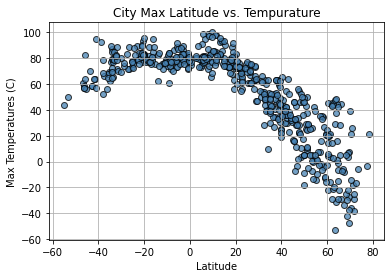

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", facecolors="steelblue", edgecolor="black" , alpha=0.75)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Tempurature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperatures (C)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

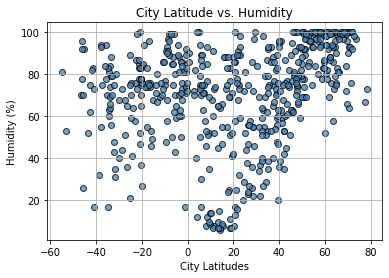

In [9]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", facecolors="steelblue", edgecolor="black" , alpha=0.75)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Humidity")
plt.xlabel("City Latitudes")
plt.ylabel("Humidity (%)")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

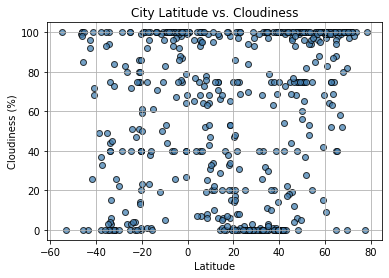

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", facecolors="steelblue", edgecolor="black" , alpha=0.75)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

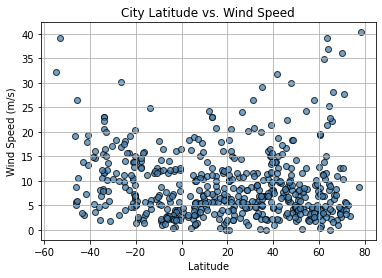

In [11]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", facecolors="steelblue", edgecolor="black" , alpha=0.75)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def lr_plot():
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regression = x_value * slope + intercept
    line_eq_coor = ( xc, yc )

    line_eq = 'y =' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
    plt.scatter(x_value, y_value, marker='o', color='steelblue', edgecolors='black')
    plt.plot(x_value, regression, color='red', linewidth=3)
    plt.annotate(line_eq, line_eq_coor, fontsize=16, color="red")
    plt.grid(True)
    print(f"The r-value is: {rvalue}")
    
   

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
norhem_df = city_data_df[(city_data_df["Lat"] >= 0)]
# Display sample data
norhem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dikson,73.5069,80.5464,-5.69,97,100,2.86,RU,1675607560
1,thompson,55.7435,-97.8558,-9.24,84,100,2.30,CA,1675607560
3,krasnovishersk,60.4078,57.0820,4.71,99,97,3.29,RU,1675607561
4,atikokan,48.7555,-91.6216,3.49,93,99,4.25,CA,1675607561
5,turukhansk,65.8167,87.9833,5.09,98,98,3.78,RU,1675607561


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
sthhem_df = city_data_df[(city_data_df["Lat"] < 0)]
# Display sample data
sthhem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,vaini,-21.2000,-175.2000,79.74,78,51,10.11,TO,1675607372
6,bambous virieux,-20.3428,57.7575,82.65,78,40,6.91,MU,1675607562
8,mount isa,-20.7333,139.5000,76.77,100,75,4.61,AU,1675607563
9,vila velha,-20.3297,-40.2925,93.15,65,0,14.97,BR,1675607563
10,ushuaia,-54.8000,-68.3000,44.22,81,100,32.21,AR,1675607563


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.874134503299191


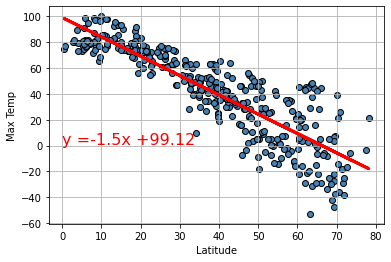

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_value = norhem_df['Lat']
y_value = norhem_df['Max Temp']
xc = 0
yc = 1

lr_plot()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

The r-value is: 0.47406591301063966


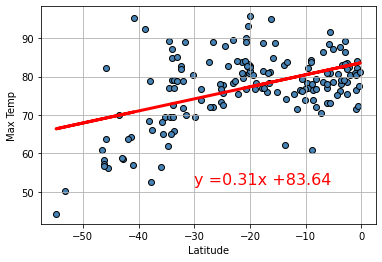

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_value = sthhem_df['Lat']
y_value = sthhem_df['Max Temp']
xc = -30
yc = 52

lr_plot()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

The correlation between latitude and the maximum temperature is strongly negative for the Northern Hemisphere. The further the distance you are away from the equator, the maximum temperature decreases.

Adversely, for the Southern Hemisphere, correlation between latitude and the maximum temperature is strongly positive.
The closer the distance you are to the equator, the maximum temperature increases.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.5209763925165098


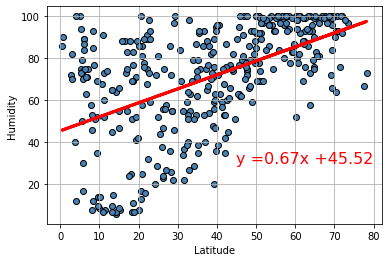

In [17]:
# Northern Hemisphere
# YOUR CODE HERE
x_value = norhem_df['Lat']
y_value = norhem_df['Humidity']
xc = 45
yc = 30

lr_plot()
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

The r-value is: 0.1770581829858607


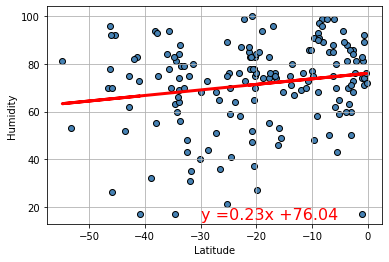

In [18]:
# Southern Hemisphere
# YOUR CODE HERE
x_value = sthhem_df['Lat']
y_value = sthhem_df['Humidity']
xc = -30
yc = 15

lr_plot()
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

The correlation between latitude and humidity is strongly positive for the Northern Hemisphere. The further the distance you are away from the equator, the humidity increases.

The Southern Hemisphere's correlation between latitude and the is also positive. The closer the distance you are to the equator, the humidity increases.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.33973718404257564


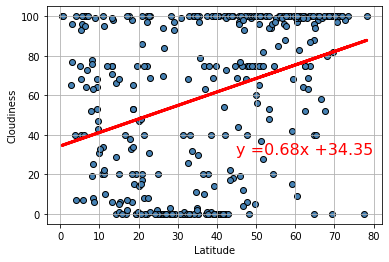

In [19]:
# Northern Hemisphere
# YOUR CODE HERE
x_value = norhem_df['Lat']
y_value = norhem_df['Cloudiness']
xc = 45
yc = 30

lr_plot()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

The r-value is: 0.3239499967316478


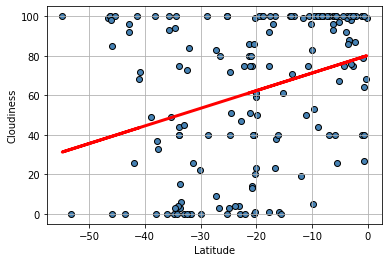

In [20]:
# Southern Hemisphere
# YOUR CODE HERE
x_value = sthhem_df['Lat']
y_value = sthhem_df['Cloudiness']
xc = 45
yc = -60

lr_plot()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

The correlation between latitude and cloudiness is strongly positive for both the Northern Hemisphere and Southern Hemisphere. The further the distance you are away from, and the closer you are to the equator the cloudiness increases.


### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.07038714252825079


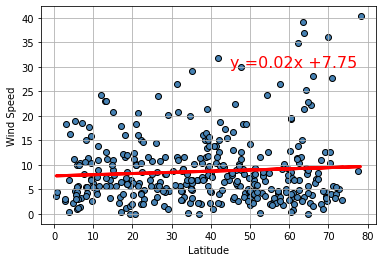

In [21]:
# Northern Hemisphere
# YOUR CODE HERE
x_value = norhem_df['Lat']
y_value = norhem_df['Wind Speed']
xc = 45
yc = 30

lr_plot()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

The r-value is: -0.41336241955554065


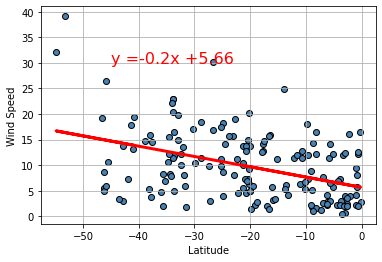

In [22]:
# Southern Hemisphere
# YOUR CODE HERE
x_value = sthhem_df['Lat']
y_value = sthhem_df['Wind Speed']
xc = -45
yc = 30

lr_plot()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

There is no clear correlation between latitude and wind speed for the Northern Hemisphere. The wind speeds stay the same, with a few peak points at high latitudes, despite the distance from the equator.

Adversely, for the Southern Hemisphere, the correlation between latitude and wind speed is strongly negative. The closer the distance you are to the equator, the wind speed decreases.